# Análisis de Estudiantes del Curso Programador

## En este proyecto, se hara un breve análisis de los estudiantes que han cursado PROGRAMADOR en un Centro de Formación Profesional en el año 2024. 
## El conjunto de datos incluye: 
- Genero: Indica el género del alumno siendo las opciones M/F/Otro
- Edad: Indica la edad del alumno
- Nacionalidad: Indica la nacionalidad del alumno.
- Localidad: Indica la localidad en donde vive el alumno.
- Finalizo:  Indica si el alumno aprobó con presentación de proyecto el curso Programador.
- Motivos Abandono: Indica el motivo por el cual el alumno no ha podido continuar cursando. Desde problemas personales, laborales y de otra índole.
- Continua Estudios: Indica si el alumno, después de aprobar el curso, ha continuado con sus estudios superiores.

### Herramientas Utilizadas
- Python y librerias: pandas, numpy, matplotlib, seaborn, folium, wordcloud, re.
- Jupyter Notebook para documentar y ejecutar el análisis paso a paso.
- Dataset: Archivo CSV que contiene los registros de los alumnos.

# Análisis Exploratorio de Datos
- Importar las librerias utilizadas en esta sección: lectura de datos y sus características.

In [4]:
# Importar la libreria y realizar el estudio
import pandas
alumnos = pandas.read_csv("Alumnos 2024.csv")

## Tamaño del dataset
- Dado que es información sobre alumnos en un año de cursada, la cantidad de registros es pequeña. 

In [5]:
alumnos.shape

(18, 7)

### Este conjunto de datos, contiene 18 registros y 7 campos.

## Muestra de datos

In [6]:
# Se visualiza el registro de estudiantes.
alumnos

,Genero,Edad,Nacionalidad,Localidad,Finalizo,Motivos Abandono,Continua Estudios
0,F,19,Argentina,Berisso,No,Personal,No
1,M,25,Argentina,Berisso,No,Laboral,No
2,F,35,Argentina,Berisso,No,Laboral,No
3,M,52,Argentina,Berisso,No,Personal,No
4,M,22,Argentina,Berisso,No,Otro,No
5,M,19,Argentina,Berisso,Si,Ninguno,UTN
6,M,24,Argentina,Berisso,No,Personal,No
7,M,20,Argentina,Berisso,Si,Ninguno,CFP/CFL
8,F,20,Argentina,Berisso,No,Otro,No
9,F,56,Argentina,Berisso,No,Personal,No


## Columnas y sus tipos de datos

In [7]:
# Se visualizan los columnas del dataset
alumnos.columns

Index(['Genero', 'Edad', 'Nacionalidad', 'Localidad', 'Finalizo',
       'Motivos Abandono', 'Continua Estudios'],
      dtype='object')

In [8]:
# Y tambien sus tipos 
alumnos.dtypes

Genero               object
Edad                  int64
Nacionalidad         object
Localidad            object
Finalizo             object
Motivos Abandono     object
Continua Estudios    object
dtype: object

### En ambos casos, tanto campo como tipo de dato son los correctos para el análisis, no hay necesidad de adecuarlos.

## Análisis estadístico descriptivo 

In [9]:
# Para este caso, solamente se cuenta con un campo de datos numericos.
alumnos.Edad.describe()

count    18.000000
mean     29.000000
std      13.297501
min      19.000000
25%      19.250000
50%      24.000000
75%      33.000000
max      58.000000
Name: Edad, dtype: float64

### Hay estudiantes muy jóvenes, algunos terminaron la secundaria en el año 2023 e ingresaron inmediatamente a capacitarse en el Centro de Formación Profesional. 

### Pero este curso no es solo para jóvenes. Se reciben también a adultos de todas las edades que tengan ganas de aprender.

In [10]:
# La distribucion del curso dependiendo del genero.
alumnos.Genero.value_counts()

Genero
M    10
F     8
Name: count, dtype: int64

### En cuanto a la diversidad de estudiantes, hay más de estudiantes masculinos que femeninos al principio de la cursada. Es una tendencia que se repite a través de los años.

# Limpieza de Datos
## Es importante señalar que el conjunto de datos empleado en este análisis ha sido sometido a un proceso de filtrado previo. Este proceso se llevó a cabo con el fin de proteger la información personal de los estudiantes, tales como DNI, números de teléfono y domicilio, los cuales fueron eliminados del conjunto de datos original. Por lo que la limpieza de datos no se verá reflejada aquí.

In [11]:
# Suma de datos nulos, si es que los contiene.
alumnos.isnull().sum()

Genero               0
Edad                 0
Nacionalidad         0
Localidad            0
Finalizo             0
Motivos Abandono     0
Continua Estudios    0
dtype: int64

In [12]:
# Suma de datos duplicados, si es que los contiene.
alumnos.duplicated().sum()

np.int64(1)

### Este dataset no contiene datos nulos o repetidos.

# Visualización de los Datos
- Para la visualización de los datos vamos a requerir las siguientes librerias.

In [13]:
# Se importan las librerias necesarias para la visualización.
import matplotlib.pyplot as mp
import seaborn

## ¿Cuántos estudiantes han aprobado el curso Programador ?

<Axes: title={'center': 'Estudiantes que aprobaron el curso'}, xlabel='Finalizado', ylabel='Cantidad de Estudiantes'>

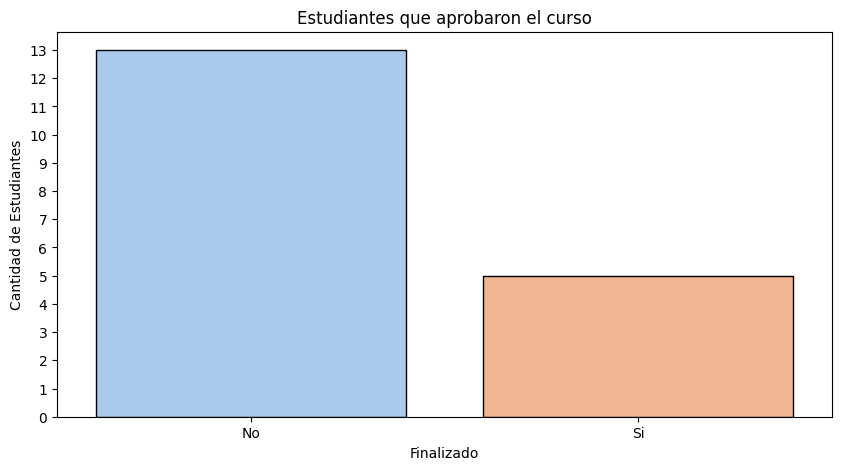

In [14]:
# Visualizacion de alumnos que aprabaron y aquellos que no.
mp.figure(figsize=(10,5))
mp.title("Estudiantes que aprobaron el curso")
mp.ylabel("Cantidad de Estudiantes")
mp.yticks(range(0,14))
mp.xlabel("Finalizado")
seaborn.countplot(x=alumnos.Finalizo, hue=alumnos.Finalizo, edgecolor="black", palette="pastel", legend=False)

### Se arrancó el año con 18 inscriptos, entre masculinos y femeninos. Pero lamentablemente, solo 5 llegaron a presentar el proyecto final. El resto tuvo que dejar el curso por diferentes motivos: algunos por temas personales, otros por el trabajo, u por otras razones.

## Con respecto a los que aprobaron ¿Han sido más hombres o mujeres?

In [15]:
# Filtramos por aquellos que si han aprobado para visualizar que finilizaron mas hombres que mujeres el curso.
condicion = alumnos['Finalizo'] == 'Si'
alumnosAprobados = alumnos[condicion]


<Axes: title={'center': 'Cantidad de aprobados por Género'}, xlabel='Género', ylabel='Número de Estudiantes'>

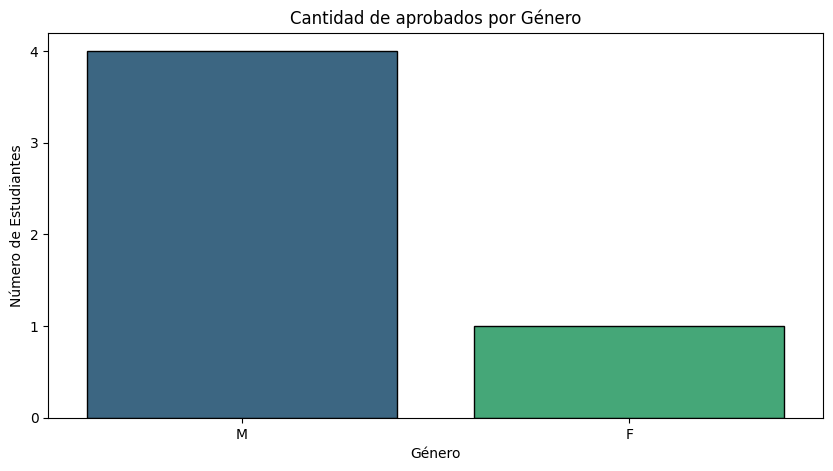

In [16]:
# Visualizacion de genero de los estudiantes que aprobaron.
mp.figure(figsize=(10,5))
mp.title("Cantidad de aprobados por Género")
mp.ylabel("Número de Estudiantes")
mp.xlabel("Género")
mp.yticks(range(0,5))
seaborn.countplot(x=alumnosAprobados.Genero, hue = alumnosAprobados.Genero, palette="viridis", edgecolor="black", legend= False)

### Apenas una sola estudiante ha apodido finalizar el curso con respecto a las 8 inscriptas en un comienzo. 

## ¿Qué ocurre después con los egresados?

<Axes: title={'center': 'Estudios Superiores Continúan'}, xlabel='Establecimientos Educativos', ylabel='Número de Estudiantes'>

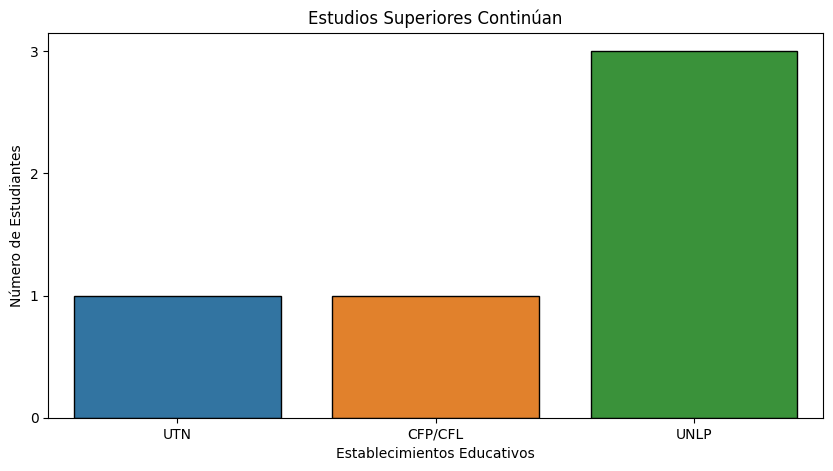

In [17]:
# Visualización de los alumnos que aprobaron el curso Programador.
orden = alumnosAprobados["Continua Estudios"].value_counts(ascending=True).index
mp.figure(figsize=(10,5))
mp.title("Estudios Superiores Continúan")
mp.ylabel("Número de Estudiantes")
mp.xlabel("Establecimientos Educativos")
mp.yticks(range(0,15))
seaborn.countplot(x=alumnosAprobados["Continua Estudios"], hue = alumnosAprobados["Continua Estudios"], edgecolor="black", legend= False)

### Los estudiantes eligen este curso por diversas razones. Muchos lo ven como una vía para obtener el certificado oficial de Programador y un título reconocido por la DGCyE. Además, lo aprendido es de gran utilidad para quienes ingresan a carreras como Licenciatura en Sistemas o Informática, Ingeniería en Sistemas o Computación, o Tecnicaturas. Si bien este estudio solamente abarca el año 2024, la realidad es que desde que se dicta el curso, ese siempre ha sido el objetivo de varios estudiantes jóvenes, y les ha servido de mucho. 

### Otros estudiantes deciden seguir ampliando sus conocimientos tomando más cursos en el Centro de Formación Profesional actual, o de la localidad. 
### ¡Los estudiantes quieren seguir aprendiendo!

## ¿Por qué hay más personas que abandonan el curso?

In [18]:
# Filtrado de alumnos que abandonaron el curso.
alumnosNoF = alumnos['Finalizo'] == 'No'
alumnosAbandonaron = alumnos[alumnosNoF]
alumnosAbandonaron

,Genero,Edad,Nacionalidad,Localidad,Finalizo,Motivos Abandono,Continua Estudios
0,F,19,Argentina,Berisso,No,Personal,No
1,M,25,Argentina,Berisso,No,Laboral,No
2,F,35,Argentina,Berisso,No,Laboral,No
3,M,52,Argentina,Berisso,No,Personal,No
4,M,22,Argentina,Berisso,No,Otro,No
6,M,24,Argentina,Berisso,No,Personal,No
8,F,20,Argentina,Berisso,No,Otro,No
9,F,56,Argentina,Berisso,No,Personal,No
11,F,26,Argentina,Berisso,No,Laboral,No
12,F,58,Argentina,Berisso,No,Personal,No


<Axes: title={'center': 'Causas de Abandono'}, xlabel='-----Motivos-----', ylabel='Número de Estudiantes'>

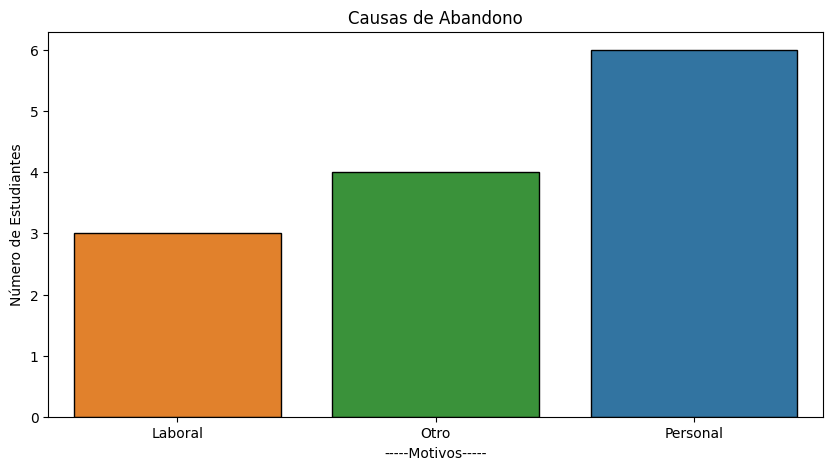

In [19]:
# Visualización de alumnos que dejaron el curso.
orden = alumnosAbandonaron["Motivos Abandono"].value_counts(ascending=True).index
mp.figure(figsize=(10,5))
mp.title("Causas de Abandono")
mp.ylabel("Número de Estudiantes")
mp.xlabel("-----Motivos-----")
mp.yticks(range(0,15))
seaborn.countplot(x=alumnosAbandonaron["Motivos Abandono"], hue = alumnosAbandonaron["Motivos Abandono"], edgecolor="black", legend= False, order = orden)

### Motivos
- Personales: Muchos se ven obligados a dejar el curso por situaciones familiares o económicas complicadas. Siempre se mantiene el contacto con estos alumnos para ser notificados cuando se reanuda el curso.

- Laborales: A veces, los horarios de trabajo se superponen con los horarios de cursada. Aunque el curso les sirve para el futuro y es de su agrado, elegir el trabajo es prioridad. Siempre se mantiene el contacto con estos alumnos para ser notificados cuando se reanuda el curso.

- Otros: Acá se encuentran aquellos estudiantes que se inscriben y al cabo de unos meses no asisten más. Este tipo de alumnos en general se ven obligados a venir porque son presionados por sus padres y siempre son los más jóvenes. No quieren tomar el curso por su propia voluntad. En otros casos simplemente no es lo que esperaban. Desde el principio, se les explica bien de qué va el curso y se les muestran los proyectos años anteriores hechas por ex-alumnos, para que sepan qué esperar. En menor medida se encuentran los alumnos que no se comportan como deben en el aula. 